# Hyperlinks

* [Imports](#Imports)
* [Dice Rolling Function](#Dice-Rolling-Function)

# Imports

In [1]:
import random as r
import matplotlib
import matplotlib.pyplot as plt


<div class = 'alert alert-info alert-success'> 
   
   Simulating Gambling Odds:
    
   1-50: The House Wins
    
   51-99: You Win
    
   100: The House Wins
    
   The house has a 1% edge winning over you. Overtime this amplifies and will become evident.
    
</div>

# Dice Rolling Function

In [2]:
def rollDice():
    # produce some number between 1 and 100
    roll = r.randint(1,100)
    
    if roll == 100:
        #print(roll)
        #print("You Lose.")
        #print('------')
        #print('\n')
        
        return False
    
    elif roll <= 50:
        #print(roll)
        #print("You Lose.")
        #print('------')
        #print('\n')
        
        return False
        
    elif 100 > roll > 50:
        #print(roll)
        #print("You Win.")
        #print('------')
        #print('\n')
        
        return True
    

In [40]:
# testing the function
x = 0
while x < 5:
    results = rollDice()
    
    x += 1

# Simple Betting Function

In [78]:
def simple_bettor(funds,initial_wager,wager_count,color):
    global simple_busts
    global simple_profits

    value = funds
    wager = initial_wager
    
    wX = []
    vY = []
    
    currentWager = 1
    
    while currentWager <= wager_count:
        if rollDice():
            value += wager
            wX.append(currentWager)
            vY.append(value)
        else:
            value -= wager
            wX.append(currentWager)
            vY.append(value)

            if value <= 0:
                currentWager += 10000000000000000
                simple_busts +=1
        currentWager += 1
        
    plt.plot(wX,vY,color)
    if value > funds:
        simple_profits+=1


In [114]:
def simple_bettor(funds,initial_wager,wager_count,color):
    global simple_busts
    #####################
    global simple_profits

    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1
    while currentWager <= wager_count:
        if rollDice():
            value += wager
            wX.append(currentWager)
            vY.append(value)
        else:
            value -= wager
            wX.append(currentWager)
            vY.append(value)

            if value <= 0:
                currentWager += 10000000000000000
                simple_busts +=1
        currentWager += 1
    plt.plot(wX,vY,color)
    #####################
    if value > funds:
        value = 0
        
        simple_profits+=1

# 10 bets

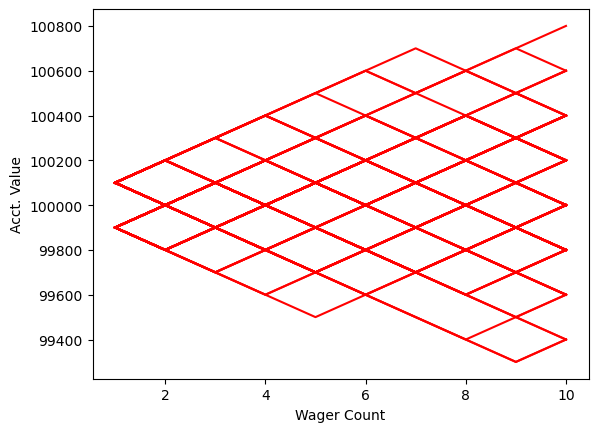

In [98]:
# test function
# I'm betting 100000 dollars in 100 dollar increments, 10 times.
x = 0 
while x < 100:
    
    simpleBetter(100000, 100, 10, 'r')
    x+=1 
    
    plt.ylabel('Acct. Value')
    plt.xlabel('Wager Count')

    

# 1000 bets

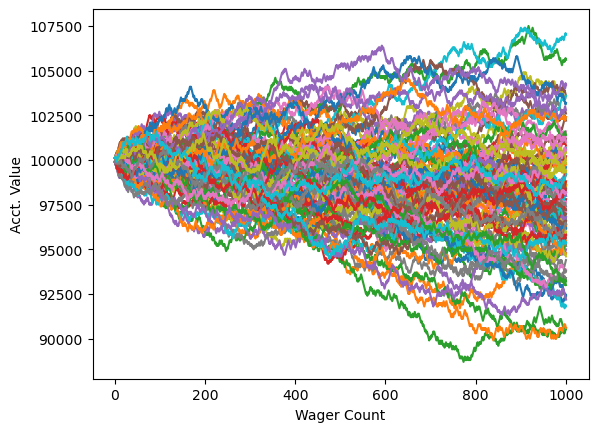

In [62]:
# I'm betting 100000 dollars in 100 dollar increments, 1000 times.
x = 0 
while x < 100:
    
    simpleBetter(100000, 100, 1000)
    x+=1 
    
    plt.ylabel('Acct. Value')
    plt.xlabel('Wager Count')

    

# 100000 bets

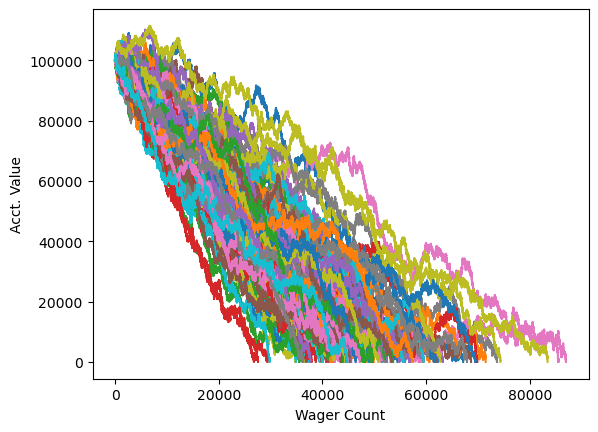

In [63]:
# I'm betting 100000 dollars in 100 dollar increments, 100000 times.
x = 0 
while x < 100:
    
    simpleBetter(100000, 100, 100000)
    x+=1 
    
    plt.ylabel('Acct. Value')
    plt.xlabel('Wager Count')

    

# Doubling Up

In [94]:
def doubler_bettor(funds,initial_wager,wager_count,color):
    
    global doubler_busts
    global doubler_profits
    
    value = funds
    wager = initial_wager
    
    wX = []
    vY = []
    
    currentWager = 1
    previousWager = 'win'
    previousWagerAmount = initial_wager

    while currentWager <= wager_count:
        if previousWager == 'win':
            if rollDice():
                value += wager
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager 
                previousWager = 'loss'
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value < 0:
                    currentWager += 10000000000000000
                    doubler_busts += 1
        elif previousWager == 'loss':
            if rollDice():
                wager = previousWagerAmount * 2
                if (value - wager) < 0:
                    wager = value
                    
                value += wager
                wager = initial_wager
                previousWager = 'win'
                wX.append(currentWager)
                vY.append(value)
            else:
                wager = previousWagerAmount * 2
                if (value - wager) < 0:
                    wager = value
                value -= wager
                previousWager = 'loss'
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)

                if value <= 0:
                    currentWager += 10000000000000000
                    doubler_busts += 1

        currentWager += 1
    plt.plot(wX,vY,color)

    if value > funds:
        doubler_profits+=1

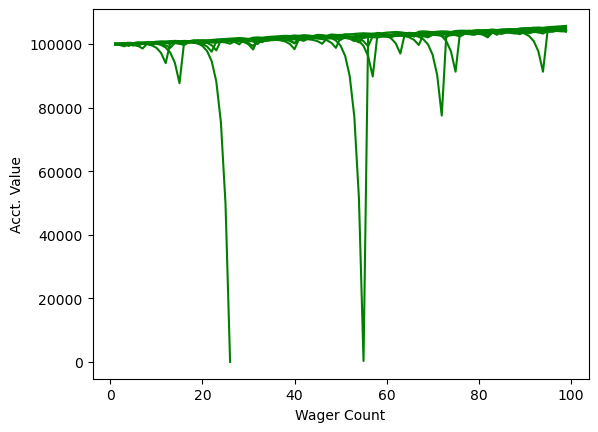

In [47]:
# I'm betting 100000 dollars in 100 dollar increments, 100 times.
x = 0 
while x < 10:
    
    doubler_bettor(100000, 100, 100)
    x+=1 
    
    plt.ylabel('Acct. Value')
    plt.xlabel('Wager Count')


Death Rate: 29.299999999999997
Survival Rate: 70.7


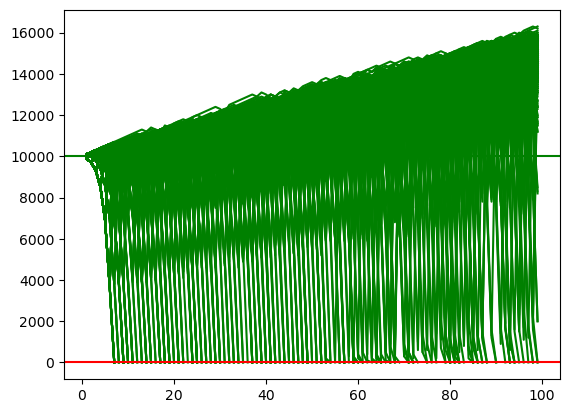

In [48]:
xx = 0
broke_count = 0

# 100 examples
while xx < 1000:
    doubler_bettor(10000, 100, 100)
    xx += 1
    
print('Death Rate:', (broke_count / float(xx)) * 100)
print('Survival Rate:', 100 - (broke_count/ float(xx)) * 100)

plt.axhline(0, color='red')
plt.axhline(10000, color='green')

plt.show()


# Compare Simple Better to Doubling Up

In [128]:
sampleSize = 100
startingFunds = 10000
wagerSize = 100
wagerCount = 10000

Simple Bettor Bust Chances: 93.0
Doubler Bettor Bust Chances: 99.0
Simple Bettor Profit Chances: 2.0
Doubler Bettor Profit Chances: 1.0


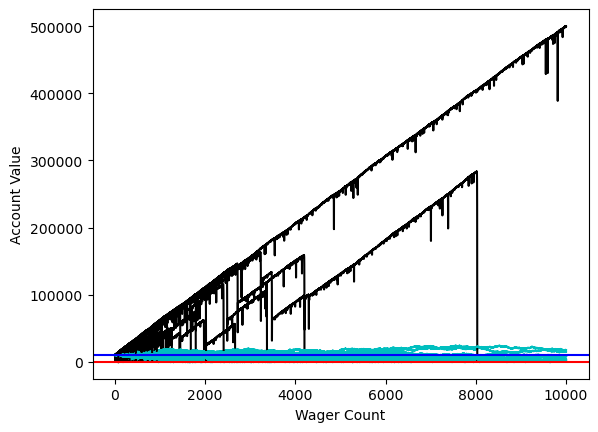

In [130]:
x = 0

simple_busts = 0.0
doubler_busts = 0.0

simple_profits = 0.0
doubler_profits = 0.0


while x < sampleSize:             
    simple_bettor(startingFunds,wagerSize,wagerCount,'c')
    #simple_bettor(startingFunds,wagerSize*2,wagerCount,'c')
    doubler_bettor(startingFunds,wagerSize,wagerCount,'k')
    x+=1


print('Simple Bettor Bust Chances:', (simple_busts/sampleSize)*100.00)
print('Doubler Bettor Bust Chances:', (doubler_busts/sampleSize)*100.00)

print ('Simple Bettor Profit Chances:', (simple_profits/sampleSize)*100.00)
print('Doubler Bettor Profit Chances:', (doubler_profits/sampleSize)*100.00)
    

plt.axhline(startingFunds, color = 'b')
plt.axhline(0, color = 'r')
plt.ylabel('Account Value')
plt.xlabel('Wager Count')
None

# Using Monte Carlo to find Best Configurations 